Вариант: 8 

$n = 20$

$ [a, b] = [1,5]$

$f(x) = x*cos(x + ln(1 + x))$

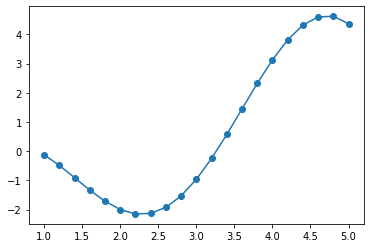

In [30]:
import matplotlib.pyplot as plt
import math

def F(x):
    return x * math.cos(x + math.log(1 + x))
 
# Структура, описывающая сплайн на каждом сегменте сетки
class Tuple:
    def __init__(self, a, b, c, d, x):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.x = x
 
# Построение сплайна
# x - узлы сетки, должны быть упорядочены по возрастанию, кратные узлы запрещены
# y - значения функции в узлах сетки
# n - количество узлов сетки
def Spline(x, y, n):
    # Инициализация массива сплайнов
    splines = [Tuple(0, 0, 0, 0, 0) for _ in range(0, n)]
    for i in range(0, n):
        splines[i].x = x[i]
        splines[i].a = y[i]
    
    splines[0].c = splines[n - 1].c = 0.0
    
    # Решение СЛАУ относительно коэффициентов сплайнов c[i] методом прогонки для трехдиагональных матриц
    # Вычисление прогоночных коэффициентов - прямой ход метода прогонки
    alpha = [0.0 for _ in range(0, n - 1)]
    beta  = [0.0 for _ in range(0, n - 1)]
 
    for i in range(1, n - 1):
        hi  = x[i] - x[i - 1]
        hi1 = x[i + 1] - x[i]
        A = hi
        C = 2.0 * (hi + hi1)
        B = hi1
        F = 6.0 * ((y[i + 1] - y[i]) / hi1 - (y[i] - y[i - 1]) / hi)
        z = (A * alpha[i - 1] + C)
        alpha[i] = -B / z
        beta[i] = (F - A * beta[i - 1]) / z
  
 
    # Нахождение решения - обратный ход метода прогонки
    for i in range(n - 2, 0, -1):
        splines[i].c = alpha[i] * splines[i + 1].c + beta[i]
    
    # По известным коэффициентам c[i] находим значения b[i] и d[i]
    for i in range(n - 1, 0, -1):
        hi = x[i] - x[i - 1]
        splines[i].d = (splines[i].c - splines[i - 1].c) / hi
        splines[i].b = hi * (2.0 * splines[i].c + splines[i - 1].c) / 6.0 + (y[i] - y[i - 1]) / hi
    return splines
 
 
# Вычисление значения интерполированной функции в произвольной точке
def Interpolate(splines, x):
    if not splines:
        return None # Если сплайны ещё не построены - возвращаем NaN
    
    n = len(splines)
    s = Tuple(0, 0, 0, 0, 0)
    
    if x <= splines[0].x: # Если x меньше точки сетки x[0] - пользуемся первым эл-тов массива
        s = splines[0]
    elif x >= splines[n - 1].x: # Если x больше точки сетки x[n - 1] - пользуемся последним эл-том массива
        s = splines[n - 1]
    else: # Иначе x лежит между граничными точками сетки - производим бинарный поиск нужного эл-та массива
        i = 0
        j = n - 1
        while i + 1 < j:
            k = i + (j - i) // 2
            if x <= splines[k].x:
                j = k
            else:
                i = k
        s = splines[j]
    
    dx = x - s.x
    # Вычисляем значение сплайна в заданной точке по схеме Горнера (в принципе, "умный" компилятор применил бы схему Горнера сам, но ведь не все так умны, как кажутся)
    return s.a + (s.b + (s.c / 2.0 + s.d * dx / 6.0) * dx) * dx;
    
a, b, n = 1, 5, 20
h = (b - a) / n
x = [round(a + i * h, 5) for i in range(n+1)]
y = [round(F(i), 5) for i in x]

spline = Spline(x, y, len(x))
plt.scatter(x, y)
plt.plot(x, y)
plt.show()


In [29]:
for i in range(n+1):
    print('x:', round(a + h / 2 + h * (i - 1), 5), end = ' ')
    print('     y: ',Interpolate(spline, a + h / 2 + h * (i - 1)))
    print('         real: ', F(round(a + h / 2 + h * (i - 1), 5)))
    print()

x: 0.9      y:  -0.12205
         real:  0.02604456010270099

x: 1.1      y:  -0.29918870847386797
         real:  -0.2946140369655614

x: 1.3      y:  -0.6916651245783969
         real:  -0.6928676148352667

x: 1.5      y:  -1.1227732932125458
         real:  -1.1224487592949213

x: 1.7      y:  -1.5318792025714205
         real:  -1.531984788193286

x: 1.9      y:  -1.8703498965017724
         real:  -1.870354562857898

x: 2.1      y:  -2.091493711421491
         real:  -2.091536665217175

x: 2.3      y:  -2.158672757812265
         real:  -2.1587139340665917

x: 2.5      y:  -2.047397757329448
         real:  -2.0474425534024854

x: 2.7      y:  -1.7477049628699421
         real:  -1.7477496956968261

x: 2.9      y:  -1.2650486411907806
         real:  -1.265087055949788

x: 3.1      y:  -0.62010547236693
         real:  -0.620133904419365

x: 3.3      y:  0.1525130306585023
         real:  0.15249161755454216

x: 3.5      y:  1.0065070997329266
         real:  1.006494059947712

x: